In [ ]:
import pandas as pd
import numpy as np
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'
from google.colab import drive
drive.mount('/content/drive')
!ls
df = pd.read_csv('/content/drive/Shared drives/Data Science for All - Womens Summit/Data/US Crunchbase Companies.csv')
df.head() #https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
#https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
#https://towardsdatascience.com/exploratory-data-analysis-with-pandas-508a5e8a5964
#https://elitedatascience.com/python-seaborn-tutorial
#https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

Mounted at /content/drive
drive  sample_data


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32,33,34,38,39,41,42,43,44,45,46,56,90,110,111,115,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Index,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Founded Date,Founded Date Precision,Headquarters Regions,Diversity Spotlight (US Only),Estimated Revenue Range,Operating Status,Full Description,Hub Tags,Number of Articles,Phone Number,Contact Email,LinkedIn,Facebook,Twitter,Website,Company Type,Closed Date,Closed Date Precision,Exit Date,Exit Date Precision,Investor Type,Investment Stage,Number of Portfolio Organizations,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Exits (IPO),Accelerator Program Type,Accelerator Application Deadline,...,IPO Status,IPO Date,Delisted Date,Delisted Date Precision,Money Raised at IPO,Money Raised at IPO Currency,Money Raised at IPO Currency (in USD),Valuation at IPO,Valuation at IPO Currency,Valuation at IPO Currency (in USD),Stock Symbol,Stock Symbol URL,Stock Exchange,Last Leadership Hiring Date,Number of Events,CB Rank (Organization),CB Rank (School),Trend Score (7 Days),Trend Score (30 Days),Trend Score (90 Days),SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Monthly Visits Growth,SEMrush - Visit Duration,SEMrush - Visit Duration Growth,SEMrush - Page Views / Visit,SEMrush - Page Views / Visit Growth,SEMrush - Bounce Rate,SEMrush - Bounce Rate Growth,BuiltWith - Active Tech Count,Apptopia - Number of Apps,Apptopia - Downloads Last 30 Days,G2 Stack - Total Products Active,IPqwery - Patents Granted,IPqwery - Trademarks Registered,IPqwery - Most Popular Trademark Class,IPqwery - Most Popular Patent Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD)
0,1,Apr-57,https://www.crunchbase.com/organization/apr57-...,"E-Commerce, Fashion, Retail, Sports","New York, New York, United States",Pavels Lisovskis opened up a Retail stamp and ...,"383,462",NaN,NaN,NaN,NaN,NaN,"Greater New York Area, East Coast, Northeaster...",NaN,NaN,Active,Pavels Lisovskis opened up a Retail stamp and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://apr57.com/,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"411,676",NaN,-0.4,-0.6,-0.8,"1,910","1,225.17",34.51%,67,97.06%,3.45,-28.65%,0%,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A & A 1st Choice LLC,https://www.crunchbase.com/organization/a-a-1s...,"Building Material, Real Estate","Round Rock, Texas, United States","We are a Round Rock, TX based company that has...","659,912",NaN,NaN,NaN,1/1/2001,year,Southern US,NaN,$1M to $10M,Active,"We are a Round Rock, TX (serving all surroundi...",NaN,NaN,(512) 767-2935,aa1stchoice512@gmail.com,NaN,https://www.facebook.com/aa1stchoicellc,NaN,http://www.aa1stchoice.com/,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"703,273",NaN,-0.2,-0.2,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A & A Auto Recycling,https://www.crunchbase.com/organization/a-a-au...,Automotive,"Bradenton, Florida, United States","Used Auto Parts Store in Bradenton, FL","1,011,536",NaN,NaN,NaN,NaN,NaN,"East Coast, Southern US",NaN,NaN,Active,"Address: 5507 9th St E, Bradenton, FL 34203, USA",NaN,NaN,941-751-2690,NaN,NaN,NaN,NaN,http://aaautorecycling.com,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,073,940",NaN,0.0,-0.1,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,A & A Custom Cornhole,https://www.crunchbase.com/organization/a-a-cu...,"Recreation, Sports","Durham, North Carolina, United States",We provide Custom Corn Hole Boards for custome...,"584,729",NaN,NaN,NaN,9/1/2013,day,"Research Triangle, East Coast, Southern US",NaN,Less than $1M,Active,W

In [ ]:
print(df.shape)
print('(Rows, Columns) \n')
df.columns

(79246, 121)
(Rows, Columns) 



Index(['Index', 'Organization Name', 'Organization Name URL', 'Industries',
       'Headquarters Location', 'Description', 'CB Rank (Company)',
       'Total Funding Amount', 'Total Funding Amount Currency',
       'Total Funding Amount Currency (in USD)',
       ...
       'Apptopia - Number of Apps', 'Apptopia - Downloads Last 30 Days',
       'G2 Stack - Total Products Active', 'IPqwery - Patents Granted',
       'IPqwery - Trademarks Registered',
       'IPqwery - Most Popular Trademark Class',
       'IPqwery - Most Popular Patent Class', 'Aberdeen - IT Spend',
       'Aberdeen - IT Spend Currency',
       'Aberdeen - IT Spend Currency (in USD)'],
      dtype='object', length=121)

In [ ]:
print('General information about the dataset \n')
df.info()
print('\n Datatypes \n')
print (df.dtypes)

General information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79246 entries, 0 to 79245
Columns: 121 entries, Index to Aberdeen - IT Spend Currency (in USD)
dtypes: float64(28), int64(1), object(92)
memory usage: 73.2+ MB

 Datatypes 

Index                                       int64
Organization Name                          object
Organization Name URL                      object
Industries                                 object
Headquarters Location                      object
                                           ...   
IPqwery - Most Popular Trademark Class     object
IPqwery - Most Popular Patent Class        object
Aberdeen - IT Spend                        object
Aberdeen - IT Spend Currency               object
Aberdeen - IT Spend Currency (in USD)     float64
Length: 121, dtype: object


In [ ]:
df.describe()

,Index,Total Funding Amount,Total Funding Amount Currency (in USD),Number of Diversity Investments,Number of Exits,Number of Exits (IPO),Accelerator Duration (in weeks),Number of Founders,Number of Funding Rounds,Last Funding Amount,Last Equity Funding Amount,Last Equity Funding Amount Currency (in USD),Total Equity Funding Amount,Total Equity Funding Amount Currency (in USD),Number of Lead Investors,Number of Investors,Number of Acquisitions,Price,Price Currency (in USD),Money Raised at IPO,Money Raised at IPO Currency (in USD),Valuation at IPO,Number of Events,Trend Score (7 Days),Trend Score (30 Days),Trend Score (90 Days),SEMrush - Page Views / Visit,G2 Stack - Total Products Active,Aberdeen - IT Spend Currency (in USD)
count,79246.000000,1.376700e+04,1.376700e+04,311.000000,498.000000,498.000000,9.000000,24537.000000,17518.000000,1.282900e+04,1.165800e+04,1.165800e+04,1.244500e+04,1.244500e+04,7313.000000,12170.000000,4198.000000,1.974000e+03,1.975000e+03,8.120000e+02,8.120000e+02,3.400000e+02,6855.000000,79245.000000,79245.000000,79245.000000,22221.000000,39380.000000,2.069100e+04
mean,39623.500000,3.857301e+07,3.759975e+07,3.041801,3.640562,3.640562,25.000000,1.601663,2.142254,2.588295e+07,1.651658e+07,1.420267e+07,2.793213e+07,2.685019e+07,1.732531,3.825555,2.959266,1.044488e+09,1.033715e+09,1.734697e+08,1.733690e+08,9.132746e+08,3.304595,0.203531,0.574530,0.698709,2.661006,16.651930,9.011871e+06
std,22876.494053,8.738516e+08,8.697097e+08,7.497625,14.387890,14.387890,33.324165,0.875542,1.921885,8.991572e+08,1.663096e+08,6.072679e+07,1.674090e+08,1.414551e+08,1.188638,4.590152,7.596822,4.214071e+09,4.197268e+09,3.795845e+08,3.795200e+08,2.032755e+09,9.927708,0.880774,1.496356,1.940214,5.349080,12.306569,2.242337e+08
min,1.000000,1.000000e+03,1.000000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,0.000000,0.000000,0.000000,7.500000e+04,1.000000e+00,3.200000e+06,3.200000e+06,1.540000e+07,0.000000,-6.900000,-5.300000,-7.500000,1.000000,0.000000,1.000000e+00
25%,19812.250000,5.700000e+05,5.700000e+05,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,4.000000e+05,5.000000e+05,5.000000e+05,7.000000e+05,7.000000e+05,1.000000,1.000000,1.000000,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,1.938750e+08,1.000000,-0.300000,-0.300000,-0.500000,1.000000,9.000000,4.418700e+04
50%,39623.500000,3.400000e+06,3.400000e+06,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,2.000000e+06,2.500000e+06,2.500000e+06,3.700000e+06,3.694301e+06,1.000000,2.000000,1.000000,1.530000e+08,1.510000e+08,8.000000e+07,8.000000e+07,3.942874e+08,1.000000,-0.100000,-0.100000,-0.100000,1.840000,15.000000,1.448590e+05
75%,59434.750000,1.750000e+07,1.741018e+07,3.000000,2.000000,2.000000,20.000000,2.000000,3.000000,9.999976e+06,1.000000e+07,1.000000e+07,1.800000e+07,1.800000e+07,2.000000,5.000000,2.000000,5.500000e+08,5.500000e+08,1.635750e+08,1.635750e+08,8.407500e+08,3.000000,0.400000,1.100000,1.400000,3.000000,21.000000,6.076745e+05
max,79246.000000,1.000000e+11,1.000000e+11,113.000000,294.000000,294.000000,104.000000,8.000000,41.000000,1.000000e+11,1.350000e+10,2.600000e+09,9.800000e+09,8.700000e+09,14.000000,100.000000,225.000000,7.400000e+10,7.400000e+10,4.600000e+09,4.600000e+09,2.305367e+10,413.000000,10.000000,10.000000,10.000000,491.000000,514.000000,1.660169e+10


In [ ]:
df.describe(include=['object', 'bool'])

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Total Funding Amount Currency,Founded Date,Founded Date Precision,Headquarters Regions,Diversity Spotlight (US Only),Estimated Revenue Range,Operating Status,Full Description,Hub Tags,Number of Articles,Phone Number,Contact Email,LinkedIn,Facebook,Twitter,Website,Company Type,Closed Date,Closed Date Precision,Exit Date,Exit Date Precision,Investor Type,Investment Stage,Number of Portfolio Organizations,Number of Investments,Number of Lead Investments,Accelerator Program Type,Accelerator Application Deadline,School Type,School Program,Number of Enrollments,School Method,Number of Founders (Alumni),Number of Alumni,...,Acquisition Status,Transaction Name,Transaction Name URL,Acquired by,Acquired by URL,Announced Date,Announced Date Precision,Price Currency,Acquisition Type,Acquisition Terms,IPO Status,IPO Date,Delisted Date,Delisted Date Precision,Money Raised at IPO Currency,Valuation at IPO Currency,Valuation at IPO Currency (in USD),Stock Symbol,Stock Symbol URL,Stock Exchange,Last Leadership Hiring Date,CB Rank (Organization),CB Rank (School),SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Monthly Visits Growth,SEMrush - Visit Duration,SEMrush - Visit Duration Growth,SEMrush - Page Views / Visit Growth,SEMrush - Bounce Rate,SEMrush - Bounce Rate Growth,BuiltWith - Active Tech Count,Apptopia - Number of Apps,Apptopia - Downloads Last 30 Days,IPqwery - Patents Granted,IPqwery - Trademarks Registered,IPqwery - Most Popular Trademark Class,IPqwery - Most Popular Patent Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency
count,79246,79246,77866,79246,79242,79246,13767,66257,66257,79246,4722,43272,79246,53401,277,26058,59451,47524,42589,46581,46420,75892,77081,1233,2692,12433,12433,355,181,1235.0,1235.0,607.0,9,11,3,1,16,2,34.0,64.0,...,13734,10786,10786,10786,10786,10785,10785,1975,9660,1366,79245,2151,427,623,812,340,341.0,2159,2160,2148,525,79245,78,22221,19207,20497,22222,14595,20498,22222,18158,72083.0,5529.0,2287,17787,17787,15852,6487,20692.0,20704
unique,76347,77258,34767,6205,77100,76008,16,5318,3,39,59,8,2,52068,9,749,57336,46046,41446,45213,45097,73905,3,444,5,4846,3,44,42,68.0,79.0,42.0,2,11,2,1,7,2,13.0,18.0,...,3,10473,10474,6811,6816,4121,2,12,5,3,3,1561,399,3,5,4,321.0,2079,2142,37,193,76118,75,14143,17455,11977,1813,8798,8730,6684,8219,320.0,235.0,1525,384,391,47,114,18437.0,2
top,Canopy,https://www.crunchbase.com/organization/commun...,Real Estate,"New York, New York, United States",SaaS,"346,574",USD,1/1/2012,year,"Greater New York Area, East Coast, Northeaster...",Women Founded,Less than $1M,Active,If you're looking to regain control over drugs...,Pledge 1%,1,19999999999,sitecontact@advanced-analytics-ai.com,https://www.linkedin.com/company/cloudsfer/,https://www.facebook.com/comodohome,https://twitter.com/connectCRE,http://automatski.com,For Profit,1/1/2020,none,1/13/1978,day,Venture Capital,Private Equity,1.0,1.0,1.0,Online,3/16/2020,Public,Four Year University,Nov-50,Online and On Campus,1.0,1.0,...,Was Acquired,Conklin & de Decker acquired by Jet Support Se...,https://www.crunchbase.com/acquisition/premier...,Gallagher,https://www.crunchbase.com/organization/arthur...,10/1/2015,day,USD,Acquisition,Cash,Private,1/13/1978,12/1/2016,day,USD,USD,288000000.0,OTCMKTS,https://www.crunchbase.com/ipo/cloudward-inc-i...,NASDAQ,7/8/2020,"364,708",906,266,"139,623,122.50",0%,0,0%,0%,100%,0%,7.0,1.0,0,0,1,Scientific and electric apparatus and instruments,Computing; Calculating,77158.0,USD
freq,9,3,1150,5316,30,6,13608,2010,38228,8770,3017,16292,76555,5,132,7671,52,8,3,4,4,4,76220,213,1458,88,12297,105,37,632.0,524.0,315.0,5,1,2,1,5,1,17.0,35.0,...,9537,3,3,55,55,19,10648,1914,8924,917,77094,88,3,425,802,333,3.0,8,3,972,10,6,3,33,9,49,5736,1980,5346,5523,4347,1694.0,977.0,80,11414,3701,3351,1630,92.0,20703


In [ ]:
df['Diversity Spotlight (US Only)'] = df['Diversity Spotlight (US Only)'].fillna('N/A') #had to convert the nulls for the conditional field to work
df['WomenFounded'] = np.where(df['Diversity Spotlight (US Only)'].str.contains('Women Founded'),True,False)
#df.filter(items=['Diversity Spotlight (US Only)'])
#df[df['Diversity Spotlight (US Only)'].str.contains('Women Founded')]
df.head

<bound method NDFrame.head of        Index  ... WomenFounded
0          1  ...        False
1          2  ...        False
2          3  ...        False
3          4  ...        False
4          5  ...        False
...      ...  ...          ...
79241  79242  ...        False
79242  79243  ...        False
79243  79244  ...        False
79244  79245  ...        False
79245  79246  ...        False

[79246 rows x 122 columns]>

In [ ]:
print('# of Women Founded:')
df['WomenFounded'].value_counts()

# of Women Founded:


False    75164
True      4082
Name: WomenFounded, dtype: int64

In [ ]:
print('Describe:')
df['WomenFounded'].describe()

Describe:


count     79246
unique        2
top       False
freq      75164
Name: WomenFounded, dtype: object

In [ ]:
print('Datatype:')
type('Total Funding Amount')
print('Describe:')
df['Total Funding Amount'].describe()

Datatype:
Describe:


count    1.376700e+04
mean     3.857301e+07
std      8.738516e+08
min      1.000000e+03
25%      5.700000e+05
50%      3.400000e+06
75%      1.750000e+07
max      1.000000e+11
Name: Total Funding Amount, dtype: float64

In [ ]:
#df['Total Funding Amount'] = pd.to_numeric(df['Total Funding Amount'], errors='coerce')
#print('\n\n')
#print (df[ pd.to_numeric(df['Total Funding Amount'], errors='coerce').isnull()])
#df['Total Funding Amount'] = df['Total Funding Amount'].fillna(0).astype(float).astype(int) #had to convert the nulls for the conditional field to work
#print (df['Total Funding Amount'])
#type('Total Funding Amount')
#df['Total Funding Amount'] = df['Total Funding Amount'].astype('int64')
#df = df.astype({'Total Funding Amount':'int64'}) 
#df.sort_values(by='Total Funding Amount', ascending=False).head()

In [ ]:
df.describe()

,Index,Total Funding Amount,Total Funding Amount Currency (in USD),Number of Diversity Investments,Number of Exits,Number of Exits (IPO),Accelerator Duration (in weeks),Number of Founders,Number of Funding Rounds,Last Funding Amount,Last Equity Funding Amount,Last Equity Funding Amount Currency (in USD),Total Equity Funding Amount,Total Equity Funding Amount Currency (in USD),Number of Lead Investors,Number of Investors,Number of Acquisitions,Price,Price Currency (in USD),Money Raised at IPO,Money Raised at IPO Currency (in USD),Valuation at IPO,Number of Events,Trend Score (7 Days),Trend Score (30 Days),Trend Score (90 Days),SEMrush - Page Views / Visit,G2 Stack - Total Products Active,Aberdeen - IT Spend Currency (in USD)
count,79246.000000,1.376700e+04,1.376700e+04,311.000000,498.000000,498.000000,9.000000,24537.000000,17518.000000,1.282900e+04,1.165800e+04,1.165800e+04,1.244500e+04,1.244500e+04,7313.000000,12170.000000,4198.000000,1.974000e+03,1.975000e+03,8.120000e+02,8.120000e+02,3.400000e+02,6855.000000,79245.000000,79245.000000,79245.000000,22221.000000,39380.000000,2.069100e+04
mean,39623.500000,3.857301e+07,3.759975e+07,3.041801,3.640562,3.640562,25.000000,1.601663,2.142254,2.588295e+07,1.651658e+07,1.420267e+07,2.793213e+07,2.685019e+07,1.732531,3.825555,2.959266,1.044488e+09,1.033715e+09,1.734697e+08,1.733690e+08,9.132746e+08,3.304595,0.203531,0.574530,0.698709,2.661006,16.651930,9.011871e+06
std,22876.494053,8.738516e+08,8.697097e+08,7.497625,14.387890,14.387890,33.324165,0.875542,1.921885,8.991572e+08,1.663096e+08,6.072679e+07,1.674090e+08,1.414551e+08,1.188638,4.590152,7.596822,4.214071e+09,4.197268e+09,3.795845e+08,3.795200e+08,2.032755e+09,9.927708,0.880774,1.496356,1.940214,5.349080,12.306569,2.242337e+08
min,1.000000,1.000000e+03,1.000000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,0.000000,0.000000,0.000000,7.500000e+04,1.000000e+00,3.200000e+06,3.200000e+06,1.540000e+07,0.000000,-6.900000,-5.300000,-7.500000,1.000000,0.000000,1.000000e+00
25%,19812.250000,5.700000e+05,5.700000e+05,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,4.000000e+05,5.000000e+05,5.000000e+05,7.000000e+05,7.000000e+05,1.000000,1.000000,1.000000,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,1.938750e+08,1.000000,-0.300000,-0.300000,-0.500000,1.000000,9.000000,4.418700e+04
50%,39623.500000,3.400000e+06,3.400000e+06,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,2.000000e+06,2.500000e+06,2.500000e+06,3.700000e+06,3.694301e+06,1.000000,2.000000,1.000000,1.530000e+08,1.510000e+08,8.000000e+07,8.000000e+07,3.942874e+08,1.000000,-0.100000,-0.100000,-0.100000,1.840000,15.000000,1.448590e+05
75%,59434.750000,1.750000e+07,1.741018e+07,3.000000,2.000000,2.000000,20.000000,2.000000,3.000000,9.999976e+06,1.000000e+07,1.000000e+07,1.800000e+07,1.800000e+07,2.000000,5.000000,2.000000,5.500000e+08,5.500000e+08,1.635750e+08,1.635750e+08,8.407500e+08,3.000000,0.400000,1.100000,1.400000,3.000000,21.000000,6.076745e+05
max,79246.000000,1.000000e+11,1.000000e+11,113.000000,294.000000,294.000000,104.000000,8.000000,41.000000,1.000000e+11,1.350000e+10,2.600000e+09,9.800000e+09,8.700000e+09,14.000000,100.000000,225.000000,7.400000e+10,7.400000e+10,4.600000e+09,4.600000e+09,2.305367e+10,413.000000,10.000000,10.000000,10.000000,491.000000,514.000000,1.660169e+10


In [ ]:
print('Describe:')
df['Total Funding Amount'].describe()

Describe:


count    1.376700e+04
mean     3.857301e+07
std      8.738516e+08
min      1.000000e+03
25%      5.700000e+05
50%      3.400000e+06
75%      1.750000e+07
max      1.000000e+11
Name: Total Funding Amount, dtype: float64

In [ ]:
print('The average funding amount is:')
df['Total Funding Amount'].mean()

The average funding amount is:


38573013.76748747

In [ ]:
print('The average funding amount for Women Founded businesses is:')
df[df['Diversity Spotlight (US Only)'].str.contains('Women Founded')].mean()

The average funding amount for Women Founded businesses is:


Index                                            4.109357e+04
Total Funding Amount                             1.831213e+07
Total Funding Amount Currency (in USD)           1.831548e+07
Number of Diversity Investments                  5.736842e+00
Number of Exits                                  4.157895e+00
Number of Exits (IPO)                            4.157895e+00
Accelerator Program Type                                  NaN
Accelerator Application Deadline                          NaN
Accelerator Duration (in weeks)                           NaN
School Type                                               NaN
School Program                                            NaN
Number of Enrollments                                     NaN
School Method                                             NaN
Number of Founders                               1.891965e+00
Number of Funding Rounds                         2.334136e+00
Last Funding Amount                              9.561662e+06
Last Equ

In [ ]:
df[df['WomenFounded']==True].mean()
df[df['WomenFounded']==False].mean()

Index                                            3.954366e+04
Total Funding Amount                             4.131300e+07
Total Funding Amount Currency (in USD)           4.020767e+07
Number of Diversity Investments                  2.866438e+00
Number of Exits                                  3.620042e+00
Number of Exits (IPO)                            3.620042e+00
Accelerator Duration (in weeks)                  2.500000e+01
Number of Founders                               1.543730e+00
Number of Funding Rounds                         2.116443e+00
Last Funding Amount                              2.799027e+07
Last Equity Funding Amount                       1.748301e+07
Last Equity Funding Amount Currency (in USD)     1.486729e+07
Total Equity Funding Amount                      2.944517e+07
Total Equity Funding Amount Currency (in USD)    2.821456e+07
Number of Lead Investors                         1.722671e+00
Number of Investors                              3.743767e+00
Number o

In [ ]:
columns_to_show = ['Total Funding Amount', 'Number of Funding Rounds', 'Number of Investors','Number of Diversity Investments']

df.groupby(['WomenFounded'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])

Total Funding Amount                        ... Number of Diversity Investments            
                             mean           std    amin  ...                             std amin   amax
WomenFounded                                             ...                                            
False                4.131300e+07  9.306682e+08  1000.0  ...                        7.351226  1.0  113.0
True                 1.831213e+07  7.128921e+07  1000.0  ...                        9.290629  1.0   41.0

[2 rows x 16 columns]

In [ ]:
df['Headquarters Regions'].value_counts().plot.bar()

NameError: ignored

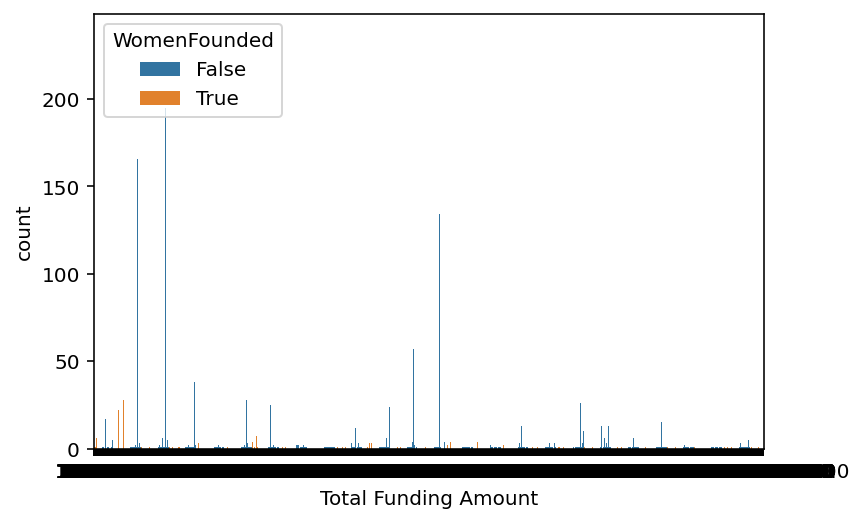

In [ ]:
sns.countplot(x='Total Funding Amount', hue='WomenFounded', data=df);

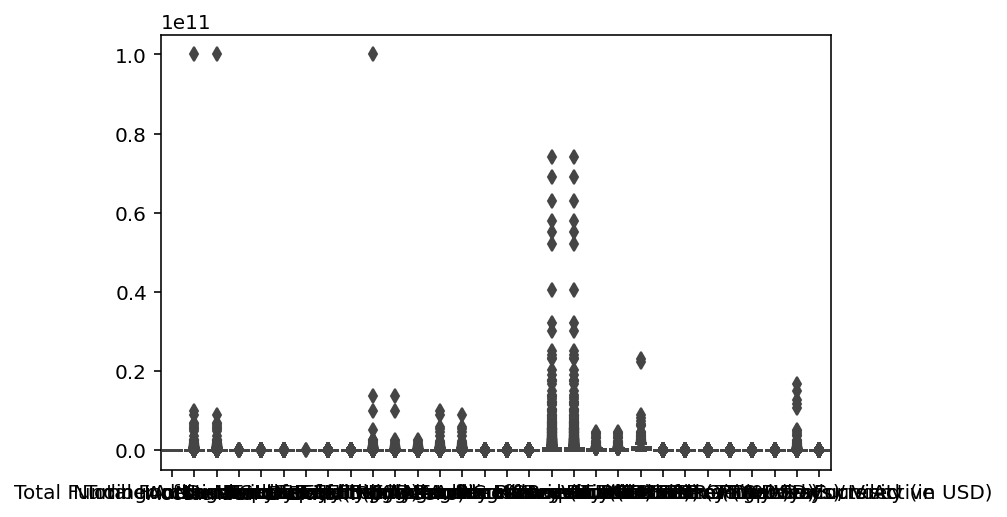

In [ ]:
sns.boxplot(data=df)

KeyboardInterrupt: ignored

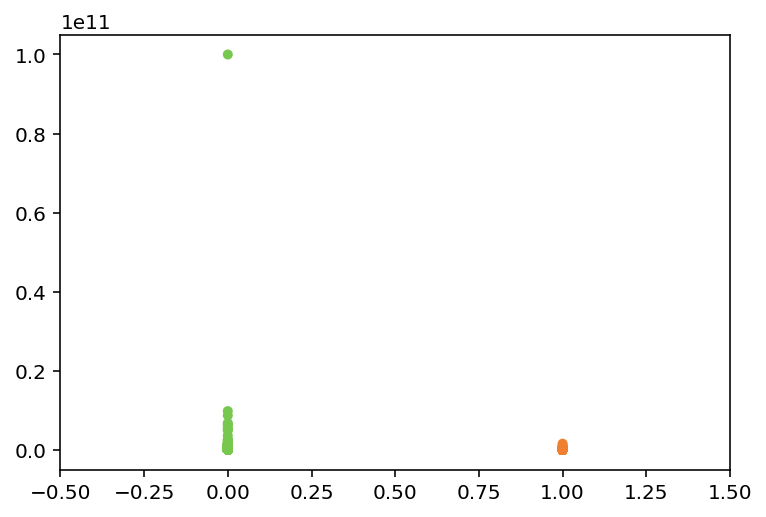

In [ ]:
wf_type_colors = ['#78C850',  # True
                    '#F08030',  # False
                  ]
sns.swarmplot(x='WomenFounded', y='Total Funding Amount', data=df, 
              palette=wf_type_colors)

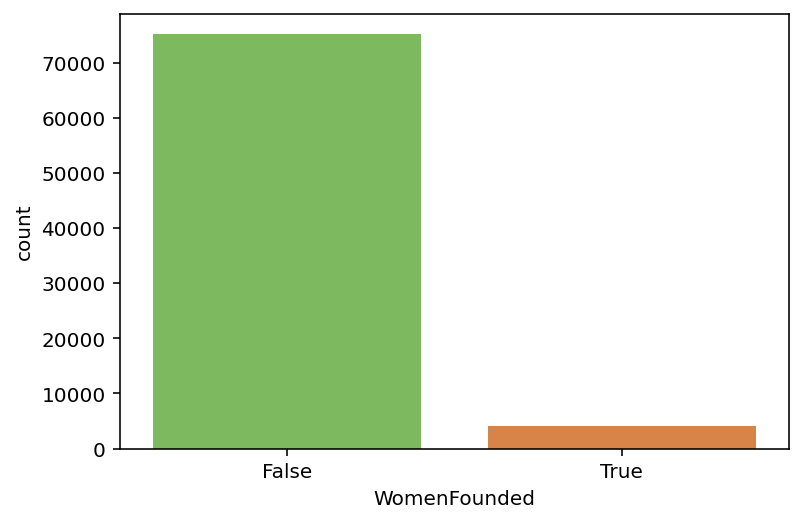

In [ ]:
sns.countplot(x='WomenFounded', data=df, palette=wf_type_colors)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


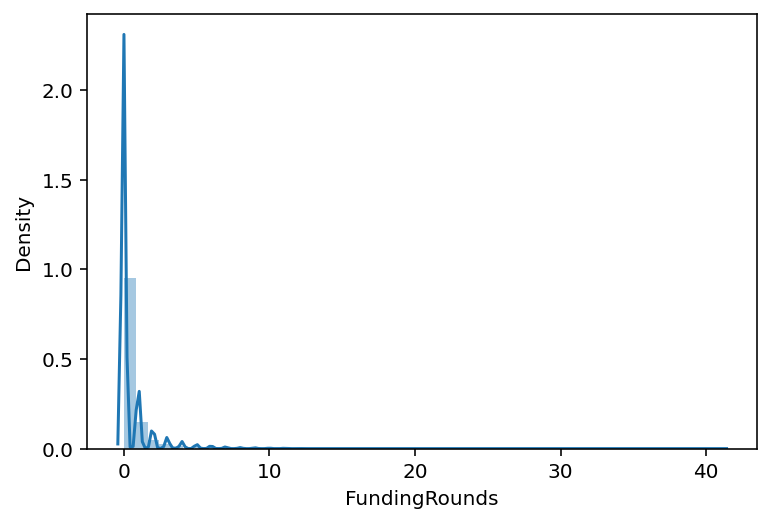

In [ ]:
df['FundingRounds'] = df['Number of Funding Rounds'].fillna(0)
sns.distplot(df.FundingRounds)

In [ ]:
df.['wfstats'] = ['Total Funding Amount', 'Number of Funding Rounds', 'WomanFounded']
# Calculate correlations
corr = wfstats_df.corr()
 
# Heatmap
sns.heatmap(corr)

SyntaxError: ignored